# Multiclass Classification
> WHen we have more than two classes as an option, it is known as **Multiclass classification**
> It also means if we have 100 different classes it is multiclass classification

# Fashion MNIST Dataset for multiclass classification

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets tensorflow

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# show the training examples
print(f"Training sample:\n{train_data[0]}\n")
print(f"Train label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
train_data[0].shape

(28, 28)

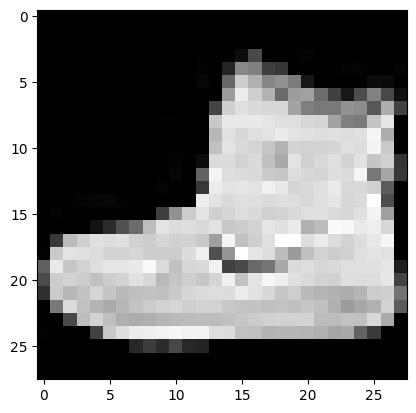

In [7]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap = "gray")

In [9]:
train_labels[0]

9

In [10]:
# create a list to index our training labels
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Dress')

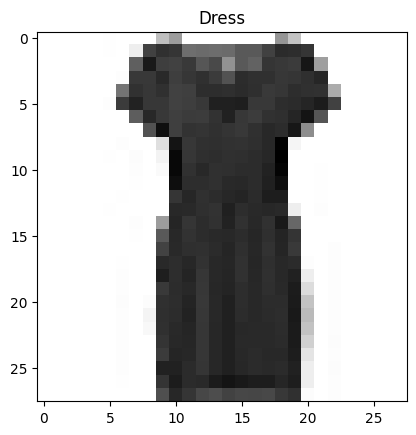

In [13]:
plt.imshow(train_data[20], cmap = plt.cm.binary)
plt.title(class_names[train_labels[20]])

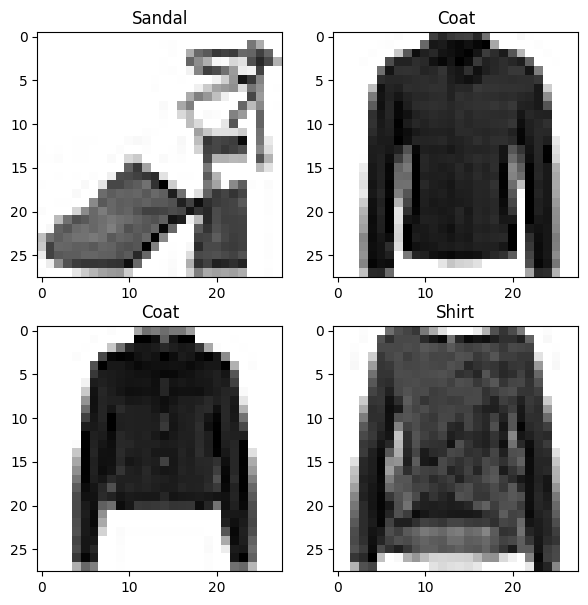

In [15]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(7,7))

for i in range(4):
  ax= plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

# Model1: Building a multiclass classification model

> CategoricalCrossentropy : OHE
> SparseCategoricalCrossentropy : labels in integer

In [18]:
# random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)
# 2. Compile
model_1.compile(
    loss = "SparseCategoricalCrossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

# 3. Fit
non_norm_history = model_1.fit(train_data, train_labels, epochs = 10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4927 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

## Normalization

In [19]:
# Checking the model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
train_data.min(), train_data.max()

(0, 255)

In [23]:
train_data_norm = train_data/255
test_data_norm = test_data/255

train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

# Model2: After Normalization

In [28]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])
model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
norm_history = model_2.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2401 - accuracy: 0.5319 - val_loss: 0.9128 - val_accuracy: 0.6828
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8336 - accuracy: 0.7119 - val_loss: 0.7908 - val_accuracy: 0.7310
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6891 - accuracy: 0.7577 - val_loss: 0.6618 - val_accuracy: 0.7587
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6083 - accuracy: 0.7819 - val_loss: 0.6178 - val_accuracy: 0.7832
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5806 - accuracy: 0.7920 - val_loss: 0.6162 - val_accuracy: 0.7872
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5653 - accuracy: 0.7975 - val_loss: 0.5957 - val_accuracy: 0.7938
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5552 - accuracy: 0.8025 - val_loss: 0.6016 - val_accuracy:

<Axes: title={'center': 'norm data loss curve'}>

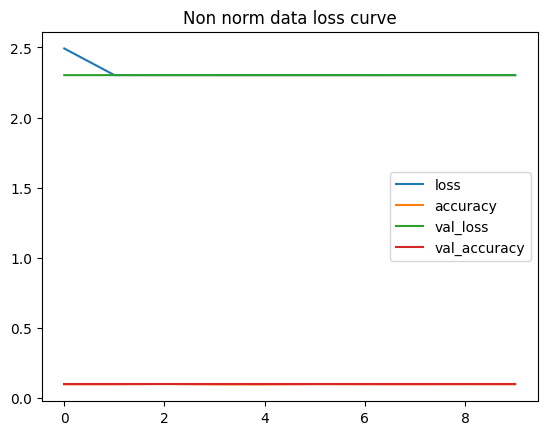

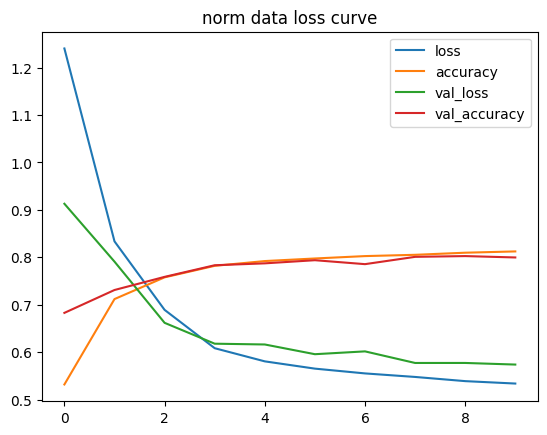

In [30]:
import pandas as pd

# plot non norm data loss curves

pd.DataFrame(non_norm_history.history).plot(title = "Non norm data loss curve")

pd.DataFrame(norm_history.history).plot(title = "norm data loss curve")

# Model3 : Tweaking learning rate

In [32]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28, 28)),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
    ]
)

model_3.compile(
    loss = "SparseCategoricalCrossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

find_lr_history =   model_3.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels), callbacks = [lrs])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1233 - accuracy: 0.5863 - val_loss: 0.7534 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6712 - accuracy: 0.7750 - val_loss: 0.6608 - val_accuracy: 0.7774 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6037 - accuracy: 0.7930 - val_loss: 0.6191 - val_accuracy: 0.7913 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5741 - accuracy: 0.8028 - val_loss: 0.5952 - val_accuracy: 0.7998 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5570 - accuracy: 0.8091 - val_loss: 0.5959 - val_accuracy: 0.7995 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5455 - accuracy: 0.8122 - val_loss: 0.5970 - val_accuracy: 0.7987 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 9s

Text(0, 0.5, 'Loss')

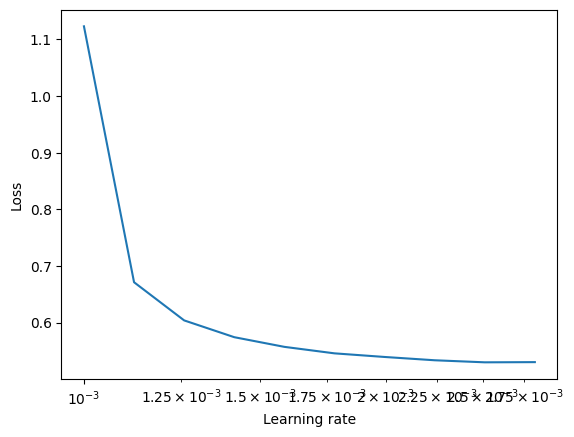

In [37]:
# Plot the learnin rate decay plots

import numpy as np
import matplotlib.pyplot as plt

learning_rate_data = 1e-3 * (10 ** (tf.range(10/20)))

plt.semilogx(find_lr_history.history["lr"], find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

## Evaluating

In [ ]:
# Evaluating our multiclass classification model we could :
# 1. Evaluate performance using Confusion matrix
# 2. Asses its preds through visualizations
# 3. Improve its results by training longer
# 4. Save and export and use in an applications

### Create a confusion matrix

In [39]:
# visualizing confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize=(10,10), text_size = 15):

  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]

  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  threshold = (cm.max() + cm.min()) / 2

  # Plot the text

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if  cm[i, j] > threshold else "black",
            size = text_size)

In [40]:
preds = model_3.predict(test_data_norm)

preds[:5]

313/313 [==============================] - 1s 1ms/step


array([[9.79139769e-10, 5.92228766e-11, 5.38806377e-09, 3.91494410e-08,
        3.79411426e-06, 2.91539937e-01, 5.42482042e-07, 8.32655504e-02,
        1.50220226e-02, 6.10168219e-01],
       [5.60065528e-05, 1.60642611e-14, 9.42249298e-01, 2.76439607e-07,
        4.73560281e-02, 5.28786556e-21, 1.03326375e-02, 9.44767732e-33,
        5.88640751e-06, 4.48848999e-28],
       [4.90217586e-04, 9.98072982e-01, 2.41241818e-08, 1.43432559e-03,
        2.43860643e-09, 9.67267044e-10, 2.39137921e-06, 4.92580602e-22,
        4.13441457e-14, 1.17348371e-18],
       [8.85994465e-04, 9.93430018e-01, 1.10992481e-07, 5.67566371e-03,
        1.82207760e-08, 6.09808426e-10, 8.08335153e-06, 3.07921788e-23,
        2.07984102e-13, 6.78988414e-19],
       [1.76727489e-01, 3.23594169e-04, 1.41950175e-01, 2.20834948e-02,
        5.66863567e-02, 1.00937416e-06, 6.01450205e-01, 5.32803036e-14,
        7.77580892e-04, 2.20503260e-12]], dtype=float32)

In [41]:
tf.round(preds[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [44]:
# convert all the predictions into integer

y_preds = preds.argmax(axis = 1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [46]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[844,   3,  15,  76,   7,   2,  29,   1,  23,   0],
       [ 19, 925,   1,  50,   3,   0,   1,   0,   1,   0],
       [ 55,   0, 590,  24, 250,   0,  65,   0,  16,   0],
       [ 63,  13,  10, 828,  45,   1,  32,   0,   8,   0],
       [  4,   0,  71,  53, 803,   0,  60,   0,   9,   0],
       [  0,   0,   0,   1,   0, 899,   1,  41,  12,  46],
       [211,   1, 100,  77, 191,   1, 382,   1,  36,   0],
       [  0,   0,   0,   0,   0,  41,   0, 883,   0,  76],
       [ 13,   0,   6,   8,  10,   5,   1,   5, 952,   0],
       [  0,   0,   0,   0,   0,  15,   0,  27,   1, 957]])

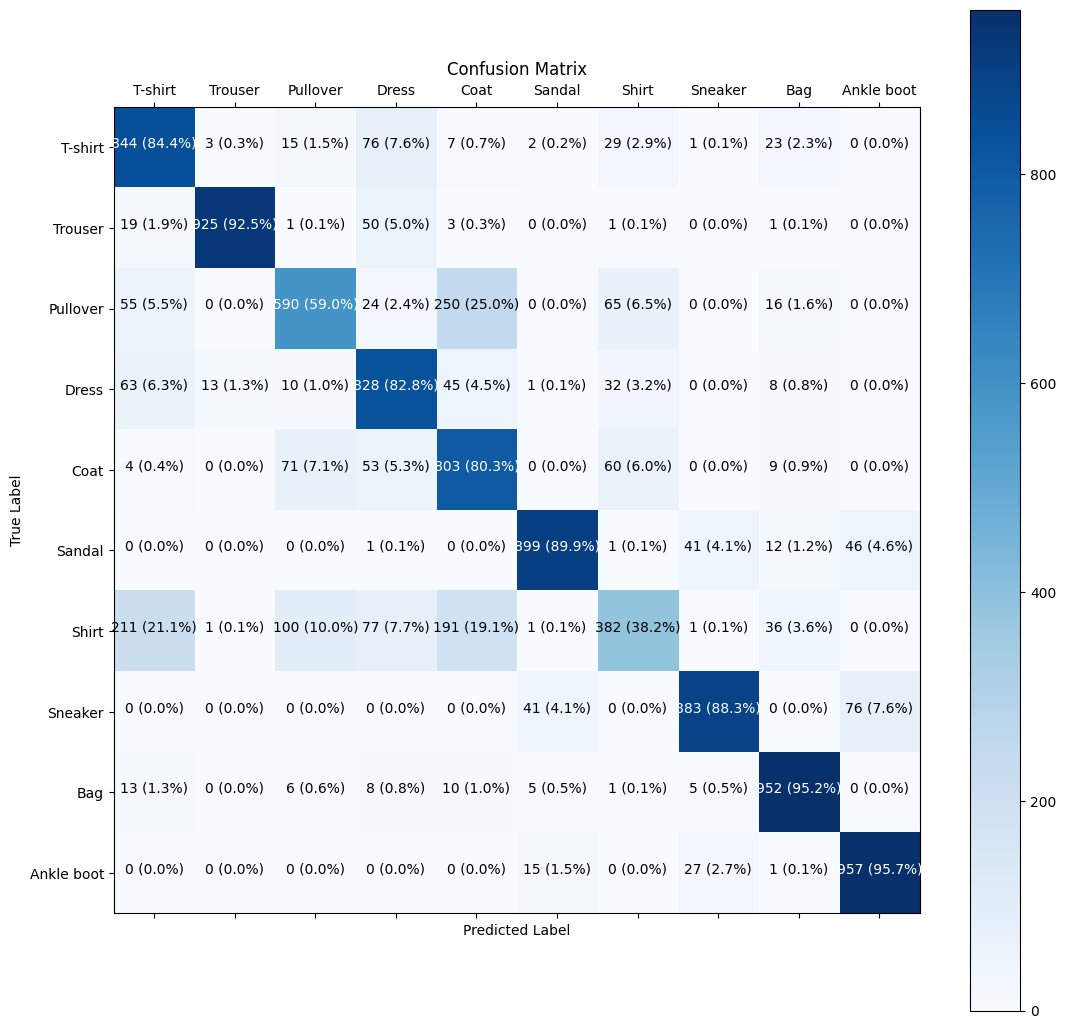

In [49]:
# visualizing the confusion matrix
make_confusion_matrix(y_true = test_labels, y_pred = y_preds, classes  = class_names, figsize = (13,13), text_size = 10)

## Predicting using our model

In [58]:
import random

def plot_random_image(model, images, true_labels, classes):
  # picks random image plots it and make prediction on it

  i = random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # only passing one image of size 28 28
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(images[i], cmap = plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f} % (True: {})".format(
      pred_label, 100*tf.reduce_max(pred_probs), true_label
  ), color = color)


1/1 [==============================] - 0s 22ms/step


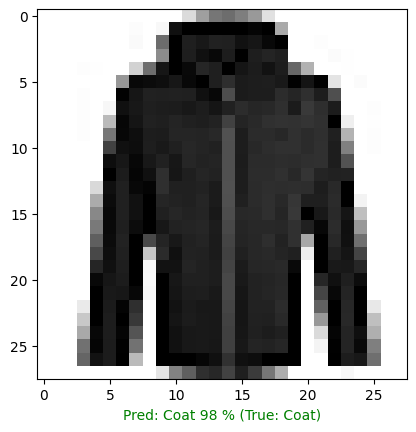

In [70]:
plot_random_image(model = model_3, images = test_data_norm, true_labels = test_labels, classes = class_names)